Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data

In [91]:
# Importing essential libraries for data analysis and visualization
import pandas as pd  # For data loading, manipulation, and analysis (DataFrames)
import numpy as np   # For numerical operations and array handling
# Visualization libraries
import matplotlib.pyplot as plt  # For creating basic visual plots (line, bar, scatter, etc.)
import seaborn as sns            # For advanced, attractive statistical plots (built on matplotlib)
# Machine learning libraries
from sklearn.cluster import KMeans  # K-Means clustering algorithm (unsupervised learning)
from sklearn.preprocessing import StandardScaler  # To scale/normalize features before clustering


In [92]:
# Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')

In [93]:
# Show first 5 rows of data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [94]:
# Create a new column for Annual Income in full dollars
df['Annual Income ($)'] = df['Annual Income (k$)'] * 1000

# View the updated DataFrame
df[['Annual Income (k$)', 'Annual Income ($)']].head()


,Annual Income (k$),Annual Income ($)
0,15,15000
1,15,15000
2,16,16000
3,16,16000
4,17,17000


In [95]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income ($)
0,1,Male,19,15,39,15000
1,2,Male,21,15,81,15000
2,3,Female,20,16,6,16000
3,4,Female,23,16,77,16000
4,5,Female,31,17,40,17000


In [96]:
# Remove the 'Annual Income (k$)' column from the DataFrame
df.drop(columns=['Annual Income (k$)'], inplace=True)

In [97]:
df.head()

,CustomerID,Gender,Age,Spending Score (1-100),Annual Income ($)
0,1,Male,19,39,15000
1,2,Male,21,81,15000
2,3,Female,20,6,16000
3,4,Female,23,77,16000
4,5,Female,31,40,17000


In [98]:
# # Show data types and check for missing values
print(df.info())
print()
# Summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
 4   Annual Income ($)       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

       CustomerID         Age  Spending Score (1-100)  Annual Income ($)
count  200.000000  200.000000              200.000000         200.000000
mean   100.500000   38.850000               50.200000       60560.000000
std     57.879185   13.969007               25.823522       26264.721165
min      1.000000   18.000000                1.000000       15000.000000
25%     50.750000   28.750000               34.750000       41500.000000
50%    100.500000   36.000000         

In [99]:
# Drop CustomerID (not useful for clustering)
df = df.drop('CustomerID', axis=1)

# Convert 'Gender' to numerical values: Male = 1, Female = 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Check updated dataset
df.head()

,Gender,Age,Spending Score (1-100),Annual Income ($)
0,1,19,39,15000
1,1,21,81,15000
2,0,20,6,16000
3,0,23,77,16000
4,0,31,40,17000


In [100]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_data = scaler.fit_transform(df)

# View scaled data shape
print("Scaled data shape:", scaled_data.shape)

Scaled data shape: (200, 4)


In [101]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

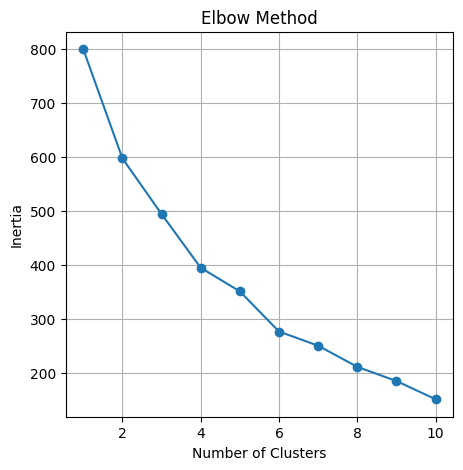

In [107]:
# Plot the elbow curve
plt.figure(figsize=(5, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [103]:
# Apply KMeans with optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Check clusters added to data
df.head()


,Gender,Age,Spending Score (1-100),Annual Income ($),Cluster
0,1,19,39,15000,2
1,1,21,81,15000,2
2,0,20,6,16000,4
3,0,23,77,16000,4
4,0,31,40,17000,4


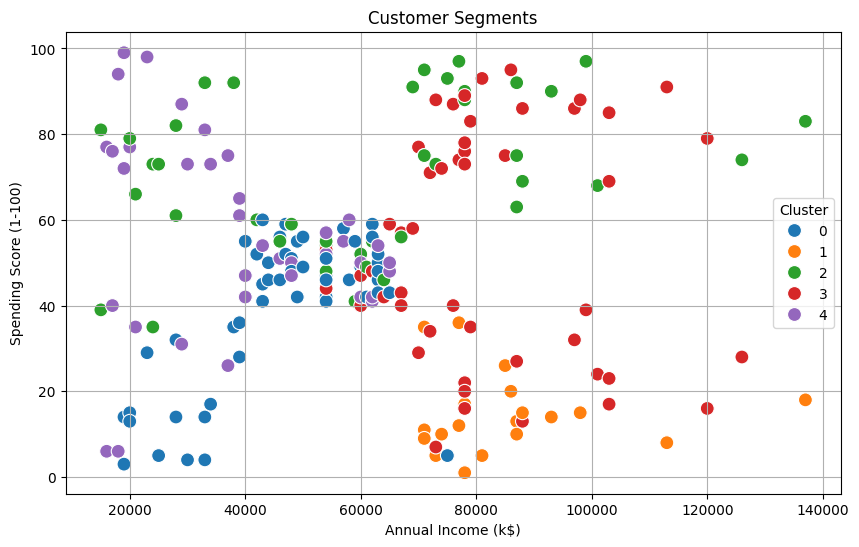

In [110]:
# 2D Scatterplot: Income vs Spending Score
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income ($)', y='Spending Score (1-100)', hue='Cluster', palette='tab10', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


In [106]:
# Define cluster labels based on your analysis
cluster_labels = {
    0: 'VIP Customers',
    1: 'Low Value',
    2: 'Impulsive Buyers',
    3: 'Potential Customers',
    4: 'Regular Customers'
}

# Create a new column with the segment names for easier interpretation
df['Segment Name'] = df['Cluster'].map(cluster_labels)

# View updated data
df[['Annual Income ($)', 'Spending Score (1-100)', 'Cluster', 'Segment Name']].head()


,Annual Income ($),Spending Score (1-100),Cluster,Segment Name
0,15000,39,2,Impulsive Buyers
1,15000,81,2,Impulsive Buyers
2,16000,6,4,Regular Customers
3,16000,77,4,Regular Customers
4,17000,40,4,Regular Customers
